### Phase 2 Project

#### Business Understanding
 
 The company wishes to venture into the movies business by creating a new movie Studio, given that they do not understand anything about movies, it is now our task to advice them on the best movies to produce based on various factors such as; Cost of production, rating, profits, number of votes the movie has and Return on investment. This project aims to come up with recomendations on which movies the company should consider before getting into the fun.

### Objectives
- Determining the film genres that are highly performing at the box office


- Evaluating the impact of renowned movie actors,directors or producers at the box office


- Establish where there exist a relationship beetween genre rating and performance


- Evaluate how production budget correlates with the revenue


- Identify the most successful month for movie releases


### Data used
- im.db
- budget_cleaned.csv

- combined_analysis.csv

- genre_averages.csv

- working_data_file.csv




In [1]:
# Import libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import scipy.stats as stats
import statsmodels.api as sm
import sqlite3




### Loading Data Using Sqlite3 And Running The Queries 
   ## Movie Basics Data 

In [ ]:
#reading the sql file 
conn=sqlite3.connect('im.db')
#import cursor 
cursor = conn.cursor ()


In [3]:
# connecting to sqlite3  and quering the database for table schemas
conn = sqlite3.connect('im.db')
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables_df = pd.read_sql(query, conn)
print(tables_df)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [9]:
#  creating a second query to get information on movie basics table 
query2 = "SELECT * From movie_basics"
df1 =pd.read_sql(query2, conn)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
#  creating a third query to get information on movie basics table 
query3 = "SELECT * From persons"
df2 =pd.read_sql(query3, conn)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [12]:
# Joining movies basics table and movie rating to create a combined csv

dt = pd.read_sql('''
    SELECT *
    FROM movie_basics 
    JOIN movie_ratings 
    USING(movie_id)
    ''',conn)
dt.to_csv('combined_analysis.csv', index=False)


In [94]:
##  Combined Analysis 
df= pd.read_csv('./Data/combined_analysis.csv')
df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [14]:
title = df[df['primary_title'].str.contains('Dark Phoenix', na=False)]
print(title)

        movie_id primary_title original_title  start_year  runtime_minutes  \
62446  tt6565702  Dark Phoenix   Dark Phoenix        2019            113.0   

                        genres  averagerating  numvotes  
62446  Action,Adventure,Sci-Fi            6.0     24451  


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


### Loading  and Quering csv Data Set using Pandas

In [17]:
# loading csv  file using  pandas 
data3= pd.read_csv('./Data/tn.movie_budgets.csv')
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [18]:
# getting info on  our csv file 

data3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### DATA CLEANING 

In [19]:
#getting sum of missing values
missingdata = data3.isnull().sum()
missingdata
#no missing values found

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [20]:
# slicing the first character '$' from the three data columns 'production_budget', 'domestic_gross' and 'worldwide_gross'
column_to_slice = ['production_budget', 'domestic_gross', 'worldwide_gross']
for i in column_to_slice:
    data3[i] = data3[i].str[1:]
data3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [21]:
# Removing comma from the data columns
no_comma_column = ['production_budget', 'domestic_gross', 'worldwide_gross']
for i in no_comma_column:
    data3[i] = data3[i].str.replace(',', '')

data3.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [97]:
# Change the data type of coulms 'production_budget', 'domestic_gross', 'worldwide_gross' to int
columns_to_int = ['production_budget', 'domestic_gross', 'worldwide_gross']
for i in columns_to_int:
    data3[i] = pd.to_numeric(data3[i], errors='coerce').astype('Int64')

data3.info()
#no missing Data found ,data has 5782 row and 7 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   Int64 
 4   domestic_gross     5782 non-null   Int64 
 5   worldwide_gross    5782 non-null   Int64 
 6   total_revenue      5782 non-null   Int64 
dtypes: Int64(4), int64(1), object(2)
memory usage: 338.9+ KB


In [28]:
# Create the 'total_revenue' column

data3['total_revenue'] = data3['domestic_gross'] + data3['worldwide_gross']
data3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


In [88]:
##  Combined Analysis 
df= pd.read_csv('./Data/combined_analysis.csv')
df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [26]:
df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [91]:
# runtime_minutes has alot of  missing values and therefore a decision to drop them
df.dropna(subset=['runtime_minutes'], inplace=True)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [75]:
dt = pd.read_csv('combined_analysis.csv')
dt.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [76]:
title = dt[dt['primary_title'].str.contains('Dark Phoenix', na=False)]
print(title)

        movie_id primary_title original_title  start_year  runtime_minutes  \
62446  tt6565702  Dark Phoenix   Dark Phoenix        2019            113.0   

                        genres  averagerating  numvotes  
62446  Action,Adventure,Sci-Fi            6.0     24451  


In [78]:
#reading cleaned budget_data.
data2 = pd.read_csv('./Data/budget_cleaned.csv')
data2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


In [79]:
#data2[['genres','averagerating','runtime_minutes']] = dt[['genres','averagerating','runtime_minutes']]
merged_data = pd.merge(data2, dt, left_on='movie', right_on='primary_title', how='left')
merged_df = merged_data[['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 
                       'worldwide_gross', 'total_revenue', 'genres', 'averagerating', 'runtime_minutes']]
merged_df.info()
#data2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6473 entries, 0 to 6472
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6473 non-null   int64  
 1   release_date       6473 non-null   object 
 2   movie              6473 non-null   object 
 3   production_budget  6473 non-null   int64  
 4   domestic_gross     6473 non-null   int64  
 5   worldwide_gross    6473 non-null   int64  
 6   total_revenue      6473 non-null   int64  
 7   genres             2867 non-null   object 
 8   averagerating      2875 non-null   float64
 9   runtime_minutes    2757 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 556.3+ KB


In [80]:
missing = merged_df.isna().sum()
missing

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
total_revenue           0
genres               3606
averagerating        3598
runtime_minutes      3716
dtype: int64

In [81]:
#dropping all the null values 
cleaned_data = merged_df.dropna()
cleaned_data.info()
# thereare 10 columns and 2752 rows 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 6471
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2752 non-null   int64  
 1   release_date       2752 non-null   object 
 2   movie              2752 non-null   object 
 3   production_budget  2752 non-null   int64  
 4   domestic_gross     2752 non-null   int64  
 5   worldwide_gross    2752 non-null   int64  
 6   total_revenue      2752 non-null   int64  
 7   genres             2752 non-null   object 
 8   averagerating      2752 non-null   float64
 9   runtime_minutes    2752 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 236.5+ KB


In [82]:
cleaned_data.loc[:,'net_revenue'] = cleaned_data['total_revenue'] - cleaned_data['production_budget']
cleaned_data['ROI'] = (cleaned_data['net_revenue'] / cleaned_data['production_budget']) * 100
cleaned_data.head()

C:\Users\Carol\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Carol\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-82-c86d584e2239>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,genres,averagerating,runtime_minutes,net_revenue,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,Horror,6.1,93.0,3111852904,732.200683
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,"Action,Adventure,Fantasy",6.6,136.0,876127750,213.377435
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,"Action,Adventure,Sci-Fi",6.0,113.0,-157475300,-44.992943
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,"Action,Adventure,Sci-Fi",7.3,141.0,1531419831,463.224389
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,"Action,Adventure,Sci-Fi",8.5,149.0,2426949682,808.983227


In [83]:
columns= list(cleaned_data.columns)
columns.remove('ROI',)
columns.remove('net_revenue',)
columns.insert(columns.index('genres'), 'ROI')
columns.insert(columns.index('ROI'), 'net_revenue')
columns
cleaned_data = cleaned_data[columns]
cleaned_data. head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,genres,averagerating,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.200683,Horror,6.1,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.377435,"Action,Adventure,Fantasy",6.6,136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.992943,"Action,Adventure,Sci-Fi",6.0,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.224389,"Action,Adventure,Sci-Fi",7.3,141.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.983227,"Action,Adventure,Sci-Fi",8.5,149.0


In [84]:
cleaned_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,genres,averagerating,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.200683,Horror,6.1,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.377435,"Action,Adventure,Fantasy",6.6,136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.992943,"Action,Adventure,Sci-Fi",6.0,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.224389,"Action,Adventure,Sci-Fi",7.3,141.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.983227,"Action,Adventure,Sci-Fi",8.5,149.0


In [85]:
#creating a new csv file called working data file 
cleaned_data.to_csv('working_data_file.csv', index=False)

In [ ]:
adult = cleaned_data[cleaned_data['genres'].str.contains('Adult', na=False)]
print(adult)

In [86]:
unique_genres = set(genre.strip() for genres_list in cleaned_data['genres'].dropna() for genre in genres_list.split(','))
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [98]:
# Initialize a list to store the average values for each genre
column_averages = []

# List of columns for which we want to calculate the averages
columns_to_average = ['averagerating', 'production_budget', 'domestic_gross', 'worldwide_gross', 
                      'total_revenue', 'net_revenue', 'ROI']

# Loop through each unique genre and calculate the averages
for genre in unique_genres:
    # Filter the DataFrame for rows containing the genre
    filtered_movies = cleaned_data[cleaned_data['genres'].str.contains(genre, na=False)]
    
    # Calculate the average for each column of interest
    avg_values = {col: filtered_movies[col].mean() for col in columns_to_average}
    
    # Create a dictionary entry with the genre and its averages
    genre_data = {'Genre': genre}
    genre_data.update(avg_values)
    
    # Append the result to the column_averages list
    column_averages.append(genre_data)

# Convert the list of dictionaries to a DataFrame for better display
averages_df = pd.DataFrame(column_averages)

# Display the head DataFrame
averages_df.head()

# Optionally, save the DataFrame to a CSV file
averages_df.to_csv('genre_averages.csv', index=False)


### Data Analysis

In [99]:
### Reading the data

df = pd.read_csv('./Data/budget_cleaned.csv')
df2 = pd.read_csv('./Data/combined_analysis.csv')
df3 = pd.read_csv('genre_averages.csv')
df4 = pd.read_csv('working_data_file.csv')


In [37]:
# to display df head - 1st 5 rows 
df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


In [38]:
# to display df2 head - 1st 5 rows 
df2.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [39]:
# to display df3 head - 1st 5 rows 
df3.head()

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI
0,Mystery,6.016742,2.137133e+07,3.143797e+07,7.013449e+07,1.015725e+08,8.020112e+07,981.774402
1,Sport,6.581967,2.420697e+07,4.023151e+07,7.903346e+07,1.192650e+08,9.505800e+07,656.995499
2,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291
3,Adventure,6.391441,9.158111e+07,1.064022e+08,2.975774e+08,4.039797e+08,3.123986e+08,333.720975
4,Action,6.117292,6.605217e+07,7.206188e+07,1.938266e+08,2.658884e+08,1.998363e+08,356.245338


In [40]:
# to display df4 head - 1st 5 rows 
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,genres,averagerating,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.200683,Horror,6.1,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.377435,"Action,Adventure,Fantasy",6.6,136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.992943,"Action,Adventure,Sci-Fi",6.0,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.224389,"Action,Adventure,Sci-Fi",7.3,141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.983227,"Action,Adventure,Sci-Fi",8.5,149.0


In [41]:
#reading the sql file 
conn=sqlite3.connect('im.db')
#import cursor 
cursor = conn.cursor ()

In [42]:
query = ("""
    SELECT name 
    FROM sqlite_master 
    WHERE type='table';
    """)
tables = pd.read_sql(query, conn)

print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [43]:
# top 10 movies that has the highest number of votes
top_10_movies_by_votes = df2.nlargest(10, 'numvotes')

# Display the top 10 movies
print(top_10_movies_by_votes[['movie_id', 'primary_title', 'numvotes']])

        movie_id            primary_title  numvotes
2387   tt1375666                Inception   1841066
2241   tt1345836    The Dark Knight Rises   1387769
280    tt0816692             Interstellar   1299334
12072  tt1853728         Django Unchained   1211405
325    tt0848228             The Avengers   1183655
507    tt0993846  The Wolf of Wall Street   1035358
1091   tt1130884           Shutter Island   1005960
15327  tt2015381  Guardians of the Galaxy    948394
2831   tt1431045                 Deadpool    820847
2523   tt1392170         The Hunger Games    795227


- The movie with the primary_title inception tops the list of the movies with the highest number of votes at  1841066, followed by The Dark Knight Rises, Interstellar,  Django Unchained,The Avengers, The Wolf of Wall Street, shutter Island, Guardians of the Galaxy,  Deadpool and the 10th  The Hunger Games.

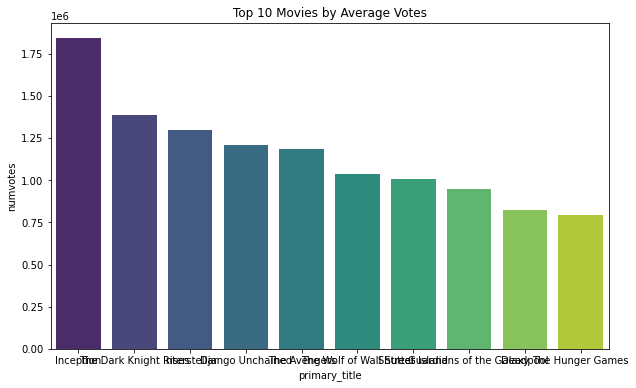

In [44]:
# plot the top 10 movies by rating using seaborn

plt.figure(figsize=(10,6))

sns.barplot(data=top_10_movies_by_votes, x='primary_title', y='numvotes', palette='viridis')

# Adding title and labels
plt.title('Top 10 Movies by Average Votes')
plt.xlabel('primary_title')
plt.ylabel('numvotes')

# Show the plot
plt.show()

In [45]:
# top 10 movies that has the highest rating
top_10_movies_by_rating = df4.nlargest(10, 'averagerating')

# Display the top 10 movies
print(top_10_movies_by_rating[['movie', 'genres', 'averagerating']])

             movie                       genres  averagerating
608        Traffic                  Documentary            9.2
1779  The Runaways                    Adventure            9.2
2216      The Wall                  Documentary            9.2
487      Dragonfly      Action,Adventure,Sci-Fi            9.0
640   Frankenstein                        Drama            9.0
1289      Survivor  Biography,Crime,Documentary            9.0
1472     Dark Blue                  Crime,Drama            8.9
1518         Bobby                        Drama            8.9
108      Inception      Action,Adventure,Sci-Fi            8.8
993    Serendipity                        Drama            8.8


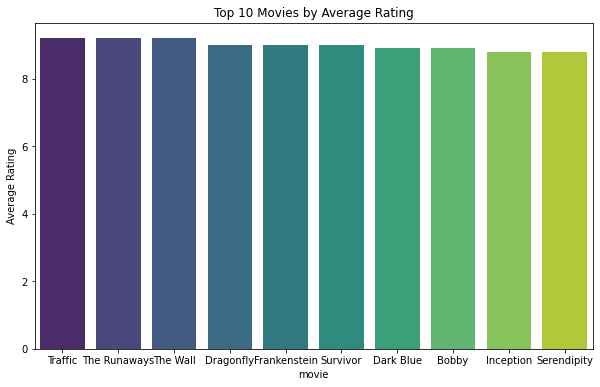

In [46]:

# Plot the top 10 movies by rating using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_movies_by_rating, x='movie', y='averagerating', palette='viridis')

# Adding title and labels
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('movie')
plt.ylabel('Average Rating')

# adding value on the bargraph
#for i , row in top_10_movies_by_rating.iterrows():
   # sns.barplot.text(movie, row['values'],round(averagerating['values'],2),color='red',ha='center',va='bottom')
# Show the plot
plt.show()

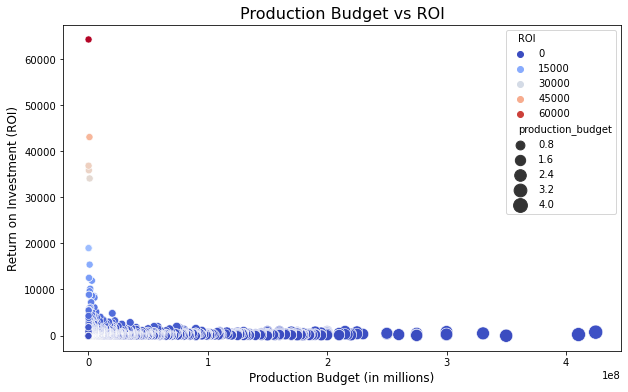

In [47]:

#  scatter plot to compare Production Budget and ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4, x='production_budget', y='ROI', hue='ROI', palette='coolwarm', size='production_budget', sizes=(50, 200))

# Adding titles and labels
plt.title('Production Budget vs ROI', fontsize=16)
plt.xlabel('Production Budget (in millions)', fontsize=12)
plt.ylabel('Return on Investment (ROI)', fontsize=12)

# Show the plot
plt.show()

Movie trafffic, The Runaways and The wall of Genre Documentary and Adventure has the highest averagerating of 9.2, and therefore we would avise the company to consider the genres Documentary while chosing their movies

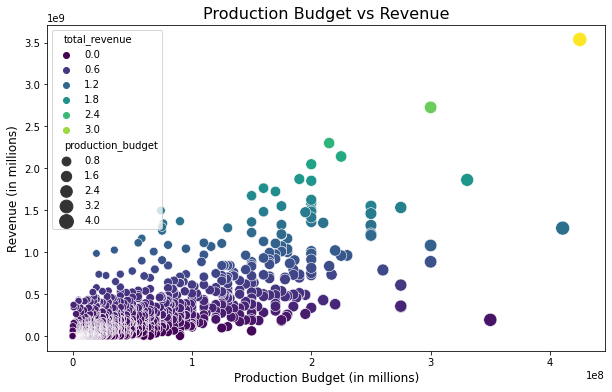

Correlation between Production Budget and Revenue: 0.77


In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4, x='production_budget', y='total_revenue', hue='total_revenue', palette='viridis', size='production_budget', sizes=(50, 200))

# Adding titles and labels
plt.title('Production Budget vs Revenue', fontsize=16)
plt.xlabel('Production Budget (in millions)', fontsize=12)
plt.ylabel('Revenue (in millions)', fontsize=12)

# Show the plot
plt.show()

correlation = df4['production_budget'].corr(df4['total_revenue'])
print(f"Correlation between Production Budget and Revenue: {correlation:.2f}")

In [49]:
top_10_movies_by_ROI = df3.nlargest(10, 'ROI')

# Display the top 10 movies
print(top_10_movies_by_ROI[['Genre', 'ROI', 'production_budget', 'total_revenue']])

          Genre          ROI  production_budget  total_revenue
21       Horror  1164.154432       1.817108e+07   9.348423e+07
0       Mystery   981.774402       2.137133e+07   1.015725e+08
9      Thriller   752.041710       2.736711e+07   1.148502e+08
1         Sport   656.995499       2.420697e+07   1.192650e+08
11    Biography   640.203056       2.545666e+07   1.070096e+08
7   Documentary   572.757720       2.253645e+07   8.811416e+07
8        Family   569.397770       5.403068e+07   2.386650e+08
6       Fantasy   549.776842       7.007436e+07   2.969202e+08
18    Animation   485.791763       8.679362e+07   4.388985e+08
12      Romance   479.335480       2.055426e+07   9.341421e+07


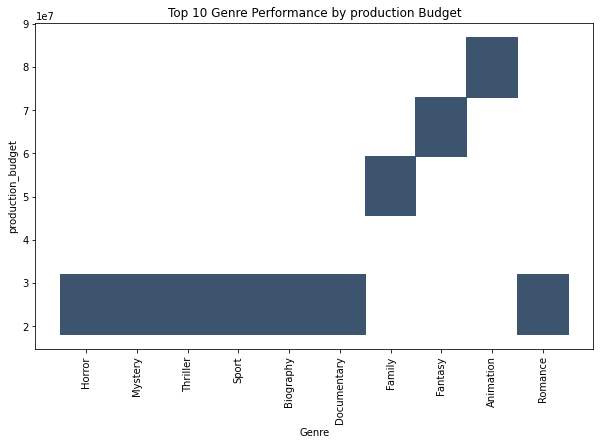

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Genre', y='production_budget', data=top_10_movies_by_ROI, palette='viridis')
plt.title('Top 10 Genre Performance by production Budget')
plt.xlabel('Genre')
plt.ylabel('production_budget')
plt.xticks(rotation=90)
plt.show()

Genre Horror has the highest return on investment and low production budget therefore a good movie genre to start with 

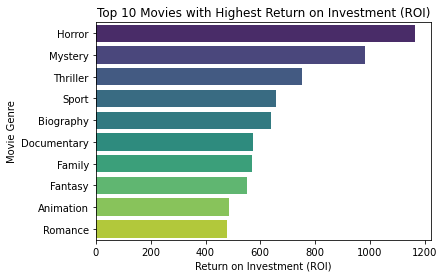

In [50]:
# Creating a bar plot using Seaborn
sns.barplot(x='ROI', y='Genre', data=top_10_movies_by_ROI, palette='viridis')

# Set labels and title
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Movie Genre')
plt.title('Top 10 Movies with Highest Return on Investment (ROI)')

# Display the plot
plt.show()

Genre Horror has the highest return on investment and therefore a good movie genre to consider for our company

In [ ]:
# comparing average ROI in years
df4['release_date'] = pd.to_datetime(df4['release_date'])

df4['year'] = df4['release_date'].dt.year
yearly_roi = df4.groupby('year')['ROI'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_roi, x='year', y='ROI', marker='o', color='g')


plt.xlabel('Release Year')
plt.ylabel('Average ROI')
plt.title('Average ROI per Year')


plt.tight_layout()
plt.show()

In [56]:
df4.info()
# working data file has 2752 rows and 13 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2752 non-null   int64  
 1   release_date       2752 non-null   object 
 2   movie              2752 non-null   object 
 3   production_budget  2752 non-null   int64  
 4   domestic_gross     2752 non-null   int64  
 5   worldwide_gross    2752 non-null   int64  
 6   total_revenue      2752 non-null   int64  
 7   net_revenue        2752 non-null   int64  
 8   ROI                2752 non-null   float64
 9   genres             2752 non-null   object 
 10  averagerating      2752 non-null   float64
 11  runtime_minutes    2752 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 258.1+ KB


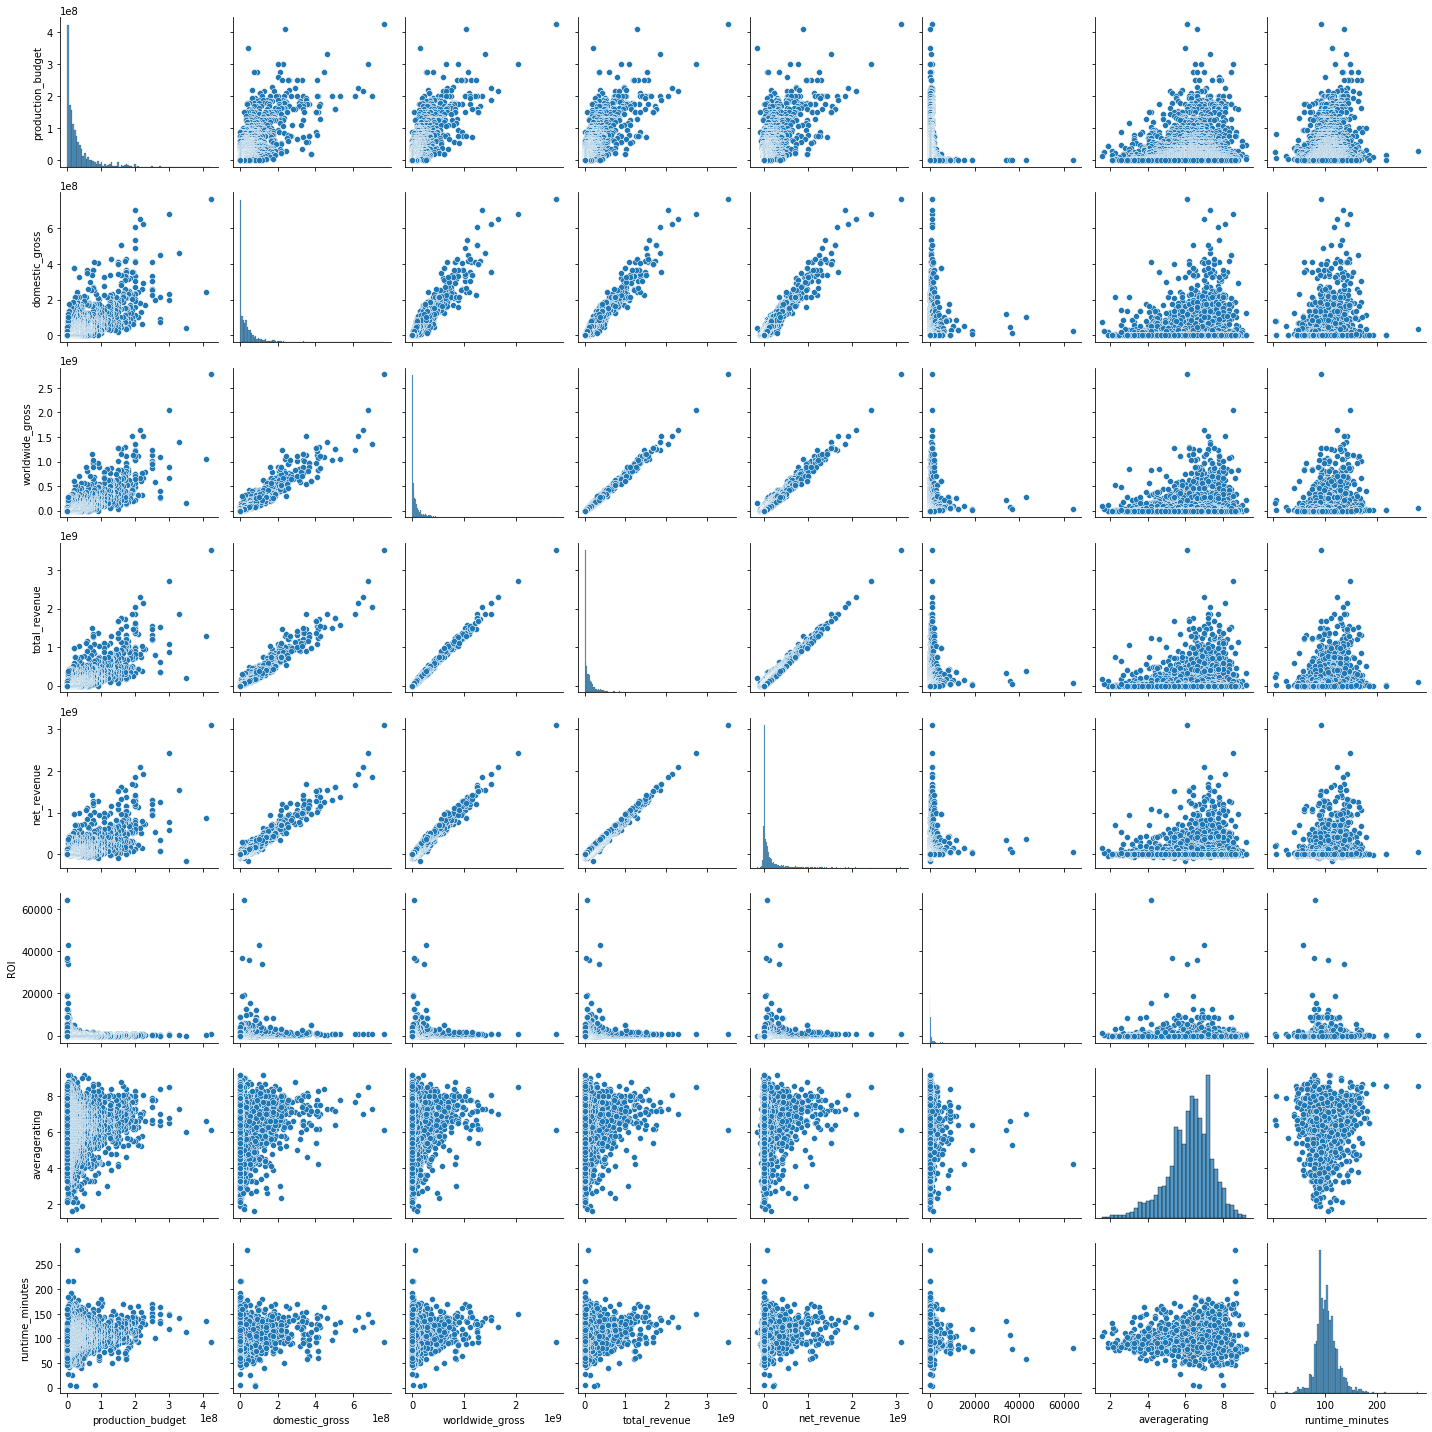

In [51]:
numerical_columns = [
    'production_budget', 'domestic_gross', 'worldwide_gross', 
    'total_revenue', 'net_revenue', 'ROI', 'averagerating', 'runtime_minutes'
]

# Create a pairplot to show the relationships between these numerical variables
sns.pairplot(df4[numerical_columns])

# Show the plot
plt.tight_layout()
plt.show()

There exists a linear relationship between worldwide gross, total revenue and net revenue
There also exists a linear relationship between net revenue, domestic gross, worldwide and net_revenue

### Getting insights from SQL

In [52]:
pd.read_sql('''
SELECT *
FROM movie_basics
''',conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [57]:
pd.read_sql('''
SELECT * 
FROM movie_ratings
''',conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [54]:
pd.read_sql('''SELECT *
                FROM movie_ratings
                JOIN movie_basics
                USING(movie_id)''',conn)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


### statistical analysis
#### hypothesis testing

           H0: There is no relationship between averageraing and ROI
           H1: There is a relationship between averagerating and ROI

In [58]:
t_statistic, p_value = stats.ttest_ind(df4['averagerating'],df4['ROI'])

print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H₀): there is a relationship between average rating and ROI.")
else:
    print("Fail to reject the null hypothesis (H₀): No significant difference.")

T-Statistic: -11.8704
P-Value: 0.0000
Reject the null hypothesis (H₀): there is a relationship between average rating and ROI.


- This therefore means that how a movie performs in average rating is likely to affect the Return on investment

In [61]:
t_statistic, p_value = stats.ttest_rel(df4['production_budget'],df4['ROI'])

# Output results
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H₀): there is a relationship production_budget and ROI.")
else:
    print("Fail to reject the null hypothesis (H₀): No significant difference.")

T-Statistic: 37.7819
P-Value: 0.0000
Reject the null hypothesis (H₀): there is a relationship production_budget and ROI.


- This means that production_budget also affects the Return on Investment

## Building a linear regression

### Linear regression

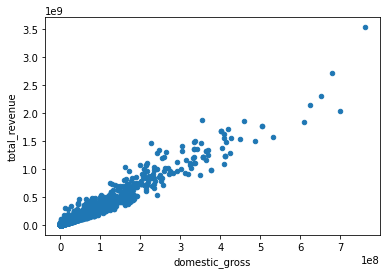

In [62]:
df4.plot.scatter(x="domestic_gross", y="total_revenue");

In [63]:
import numpy as np
rho = np.corrcoef(df4["domestic_gross"], df4["total_revenue"])[0][1]
s_y = df4["total_revenue"].std()
s_x = df4["domestic_gross"].std()
m = rho * s_y / s_x

mean_y = df4["total_revenue"].mean()
mean_x = df4["domestic_gross"].mean()
c = mean_y - m * mean_x

print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")

Our regression line is: y = 3.57165x + -7690939.03658


In [64]:
X = df4[["domestic_gross"]]
y = df4["total_revenue"]

In [65]:
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [66]:
results = model.fit()
results

In [67]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          total_revenue   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 4.536e+04
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:23:57   Log-Likelihood:                -53447.
No. Observations:                2752   AIC:                         1.069e+05
Df Residuals:                    2750   BIC:                         1.069e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.691e+06   1.45e+06     -5.

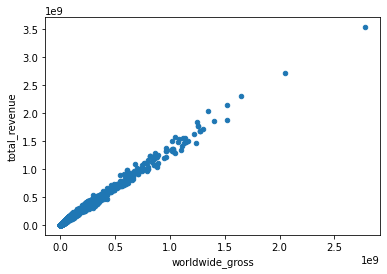

In [68]:
df4.plot.scatter(x="worldwide_gross", y="total_revenue");

In [69]:
rho = np.corrcoef(df4["total_revenue"], df4["worldwide_gross"])[0][1]
s_y = df4["total_revenue"].std()
s_x = df4["worldwide_gross"].std()
m = rho * s_y / s_x

mean_y = df4["total_revenue"].mean()
mean_x = df4["worldwide_gross"].mean()
c = mean_y - m * mean_x

print(f"Our regression line is: y = {round(m, 5)}x + {round(c, 5)}")

Our regression line is: y = 1.34814x + 7240517.08961


In [70]:
X = df4[["worldwide_gross"]]
y = df4["total_revenue"]

In [71]:
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [72]:
results = model.fit()
results

In [73]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          total_revenue   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.526e+05
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -50696.
No. Observations:                2752   AIC:                         1.014e+05
Df Residuals:                    2750   BIC:                         1.014e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.241e+06   5.19e+05     

From the analysis above

- worldwide gross explains 99% of the total revenue


- domestic gross explains 94% of the total revenue

### Recommendations

- From the above analysis, Horror movies tend to give the highest Return On Investment and therefore the company can consider horror movies for production.

- Genre documentary and adventure gives a good average rating and therefore recommends them for consideration by the company


- The higher the production budget, the Higher the total_revenue. We would therefore advise that the company should consider the production budget of a movie before production.

In [111]:
#reading genre averages csv file
df=pd.read_csv("genre_averages.csv")
df.head()

,Genre,averagerating,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI
0,Drama,6.436692,2.370732e+07,2.908992e+07,6.176916e+07,9.085908e+07,6.715177e+07,434.595038
1,Music,6.445556,2.024911e+07,4.066417e+07,8.954808e+07,1.302122e+08,1.099631e+08,414.095814
2,Family,6.217986,5.403068e+07,7.109600e+07,1.675690e+08,2.386650e+08,1.846343e+08,569.397770
3,Sci-Fi,6.155500,7.100522e+07,9.272728e+07,2.499700e+08,3.426973e+08,2.716921e+08,341.363291
4,News,6.800000,1.660000e+07,9.403741e+06,3.668208e+07,4.608582e+07,2.948582e+07,135.016469


In [110]:
#to display first 5 rows 
dt=pd.read_csv('working_data_file.csv')
dt.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_revenue,net_revenue,ROI,genres,averagerating,runtime_minutes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.200683,Horror,6.1,93.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.377435,"Action,Adventure,Fantasy",6.6,136.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.992943,"Action,Adventure,Sci-Fi",6.0,113.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.224389,"Action,Adventure,Sci-Fi",7.3,141.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.983227,"Action,Adventure,Sci-Fi",8.5,149.0


In [112]:
#getting data information, the data has 22 rows and 8 coumns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              22 non-null     object 
 1   averagerating      22 non-null     float64
 2   production_budget  22 non-null     float64
 3   domestic_gross     22 non-null     float64
 4   worldwide_gross    22 non-null     float64
 5   total_revenue      22 non-null     float64
 6   net_revenue        22 non-null     float64
 7   ROI                22 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.5+ KB


In [113]:
df1=pd.DataFrame(dt)
df1=df1.drop(columns=["production_budget","domestic_gross","worldwide_gross","total_revenue","net_revenue",'runtime_minutes'])
df1

,id,release_date,movie,ROI,genres,averagerating
0,1,"Dec 18, 2009",Avatar,732.200683,Horror,6.1
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,213.377435,"Action,Adventure,Fantasy",6.6
2,3,"Jun 7, 2019",Dark Phoenix,-44.992943,"Action,Adventure,Sci-Fi",6.0
3,4,"May 1, 2015",Avengers: Age of Ultron,463.224389,"Action,Adventure,Sci-Fi",7.3
4,7,"Apr 27, 2018",Avengers: Infinity War,808.983227,"Action,Adventure,Sci-Fi",8.5
...,...,...,...,...,...,...
2747,62,"Dec 31, 2014",Stories of Our Lives,-100.000000,Drama,7.5
2748,68,"Jul 6, 2001",Cure,1791.920000,Drama,4.9
2749,73,"Jan 13, 2012",Newlyweds,1.866667,"Comedy,Drama",6.4
2750,78,"Dec 31, 2018",Red 11,-100.000000,"Horror,Sci-Fi,Thriller",5.6


In [115]:
df1['release_date']=df1['release_date'].str.slice(0,3)
df1

,id,release_date,movie,ROI,genres,averagerating
2702,80,Jul,The Gallows,64320.884000,"Horror,Mystery,Thriller",4.2
2530,47,Aug,Bambi,43116.433566,"Biography,Documentary",7.0
2700,77,Oct,Night of the Living Dead,36894.849123,Horror,5.3
2628,37,Oct,Halloween,35900.000000,"Horror,Thriller",6.6
2463,11,Nov,Rocky,34123.514700,"Action,Comedy,Drama",6.1
...,...,...,...,...,...,...
2248,67,Feb,Enter the Dangerous Mind,-100.000000,Thriller,5.2
2521,33,Mar,Ask Me Anything,-100.000000,Drama,6.1
2520,32,Aug,Jesse,-100.000000,"Action,Crime,Drama",4.9
2519,31,Dec,Trance,-100.000000,"Crime,Drama,Mystery",6.9


In [114]:
# sorting  data by RIO Column 
df1=df1.sort_values(by="ROI", ascending=False)
df1

,id,release_date,movie,ROI,genres,averagerating
2702,80,"Jul 10, 2015",The Gallows,64320.884000,"Horror,Mystery,Thriller",4.2
2530,47,"Aug 13, 1942",Bambi,43116.433566,"Biography,Documentary",7.0
2700,77,"Oct 1, 1968",Night of the Living Dead,36894.849123,Horror,5.3
2628,37,"Oct 17, 1978",Halloween,35900.000000,"Horror,Thriller",6.6
2463,11,"Nov 21, 1976",Rocky,34123.514700,"Action,Comedy,Drama",6.1
...,...,...,...,...,...,...
2248,67,"Feb 6, 2015",Enter the Dangerous Mind,-100.000000,Thriller,5.2
2521,33,"Mar 3, 2015",Ask Me Anything,-100.000000,Drama,6.1
2520,32,"Aug 12, 2014",Jesse,-100.000000,"Action,Crime,Drama",4.9
2519,31,"Dec 31, 2012",Trance,-100.000000,"Crime,Drama,Mystery",6.9


In [116]:
#checking the highest month with higest return 
highest_return_month=df1.loc[df1['ROI'].idxmax(),'release_date']
print(f"The month with the highest return is:{highest_return_month}")

The month with the highest return is:Jul


In [117]:
# displaying top 20 row with the higest ROI
top_20_months=df1.sort_values(by='ROI',ascending=False)
top_20_months=df1.head(20)
top_20_months

,id,release_date,movie,ROI,genres,averagerating
2702,80,Jul,The Gallows,64320.884000,"Horror,Mystery,Thriller",4.2
2530,47,Aug,Bambi,43116.433566,"Biography,Documentary",7.0
2700,77,Oct,Night of the Living Dead,36894.849123,Horror,5.3
2628,37,Oct,Halloween,35900.000000,"Horror,Thriller",6.6
2463,11,Nov,Rocky,34123.514700,"Action,Comedy,Drama",6.1
2643,69,May,Graduation Day,19015.200000,Thriller,5.0
2701,78,Feb,The Birth of a Nation,18990.909091,"Biography,Drama,History",6.4
2464,12,Jan,The Devil Inside,15402.243500,Horror,4.2
2566,30,Nov,Benji,12523.824000,"Crime,Drama,Family",6.4
2567,30,Nov,Benji,12523.824000,"Documentary,Sport",7.4


In [118]:
#Groupin by month and calculating monthly average return
monthly_returns=df1.groupby('release_date')['ROI'].mean().reset_index()
monthly_returns

,release_date,ROI
0,Apr,711.323671
1,Aug,523.219468
2,Dec,230.066251
3,Feb,562.681517
4,Jan,771.783130
5,Jul,756.544080
6,Jun,379.400636
7,Mar,297.114861
8,May,401.608026
9,Nov,678.967587


In [120]:
# Sorting monthly return is descending order 
monthly_returns=monthly_returns.sort_values(by='ROI',ascending=False)
monthly_returns

,release_date,ROI
4,Jan,771.783130
5,Jul,756.544080
0,Apr,711.323671
10,Oct,704.559009
9,Nov,678.967587
3,Feb,562.681517
1,Aug,523.219468
8,May,401.608026
6,Jun,379.400636
7,Mar,297.114861


## Jan and July comes out as the best months with the higest returns

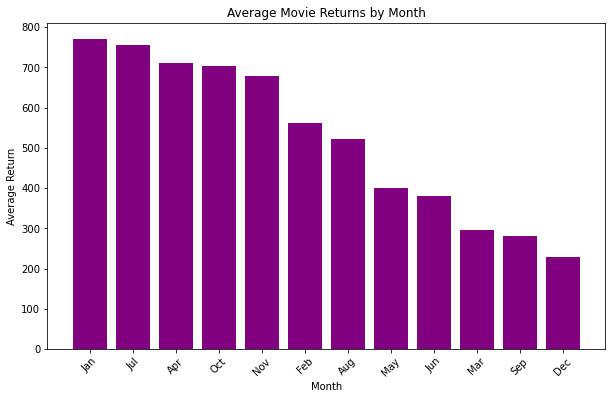

In [121]:
#Plotting the average returns by month
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(monthly_returns['release_date'],monthly_returns['ROI'],color='purple')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.title('Average Movie Returns by Month')
plt.xticks(rotation=45)
plt.show()

From the visualization above,it is evident that the top 5 monthly releases with the highest returns are January,July,April and October. We would therefore advise this month's to be the best time to make movie releases in order for them to have maximum impact and potentially capitalize on periods of higher consuming spending

Type Markdown and LaTeX:  𝛼2

In [122]:
df1=df1.sort_values(by="averagerating", ascending=False)
df1

,id,release_date,movie,ROI,genres,averagerating
1779,57,Mar,The Runaways,-6.817842,Adventure,9.2
608,16,Dec,Traffic,592.515575,Documentary,9.2
2216,29,May,The Wall,109.944200,Documentary,9.2
640,3,Nov,Frankenstein,197.805760,Drama,9.0
487,28,Feb,Dragonfly,0.212683,"Action,Adventure,Sci-Fi",9.0
...,...,...,...,...,...,...
1374,54,Feb,Forsaken,-100.000000,Horror,2.1
641,3,Nov,Frankenstein,197.805760,"Drama,Horror",1.9
653,26,Dec,Foodfight!,-99.836209,"Action,Animation,Comedy",1.9
1068,44,Apr,The Losers,113.821088,Drama,1.7


In [123]:
#Groupin by month and calculating monthly average rting
monthly_ratings=df1.groupby('release_date')['averagerating'].mean().reset_index()
monthly_ratings

,release_date,averagerating
0,Apr,6.200000
1,Aug,6.196476
2,Dec,6.243840
3,Feb,6.162371
4,Jan,6.086857
5,Jul,6.247343
6,Jun,6.281250
7,Mar,6.205652
8,May,6.296703
9,Nov,6.527193


In [125]:
monthly_ratings=monthly_ratings.sort_values(by="averagerating", ascending=False)
monthly_ratings

,release_date,averagerating
9,Nov,6.527193
8,May,6.296703
6,Jun,6.281250
5,Jul,6.247343
2,Dec,6.243840
10,Oct,6.234981
7,Mar,6.205652
11,Sep,6.202542
0,Apr,6.200000
1,Aug,6.196476


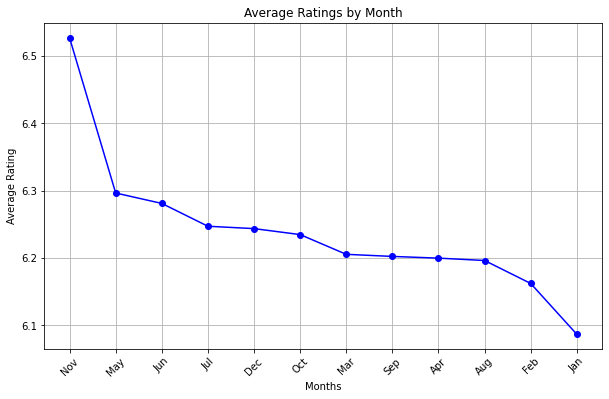

In [126]:
#Visualizing average ratings
plt.figure(figsize=(10,6))
plt.plot(monthly_ratings['release_date'],monthly_ratings['averagerating'],marker='o',linestyle='-',color='b')
plt.xlabel('Months')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

From the plot above,we can conclude that the months with the highest ratings are November,May,June and July.It thus advisable to release movies on the particular month

In [127]:
#Groupin by Month and calculating average rating and ROI
monthly_stats=df1.groupby('release_date').agg({'ROI':'mean','averagerating':'mean'}).reset_index()
monthly_stats

,release_date,ROI,averagerating
0,Apr,711.323671,6.200000
1,Aug,523.219468,6.196476
2,Dec,230.066251,6.243840
3,Feb,562.681517,6.162371
4,Jan,771.783130,6.086857
5,Jul,756.544080,6.247343
6,Jun,379.400636,6.281250
7,Mar,297.114861,6.205652
8,May,401.608026,6.296703
9,Nov,678.967587,6.527193


In [128]:
#sorting months by average return and rating in descending order
monthly_stats=monthly_stats.sort_values(by=['ROI','averagerating'],ascending=False)
monthly_stats

,release_date,ROI,averagerating
4,Jan,771.783130,6.086857
5,Jul,756.544080,6.247343
0,Apr,711.323671,6.200000
10,Oct,704.559009,6.234981
9,Nov,678.967587,6.527193
3,Feb,562.681517,6.162371
1,Aug,523.219468,6.196476
8,May,401.608026,6.296703
6,Jun,379.400636,6.281250
7,Mar,297.114861,6.205652


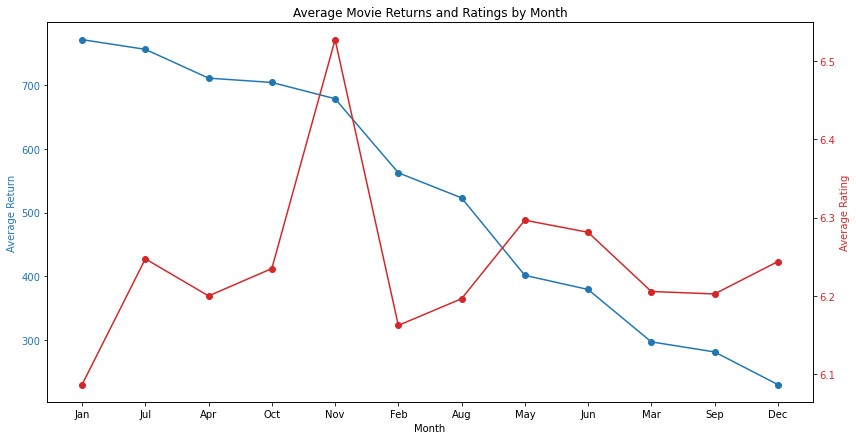

In [129]:
#visualising average return rate by month
fig, ax1 = plt.subplots(figsize=(12, 6)) 
color = 'tab:blue' 
ax1.set_xlabel('Month') 
ax1.set_ylabel('Average Return', color=color) 
Returns=ax1.plot(monthly_stats['release_date'], monthly_stats['ROI'], marker='o', linestyle='-', color=color, label='Average Return') 
ax1.tick_params(axis='y', labelcolor=color) 
ax2 = ax1.twinx() 
color = 'tab:red'
Ratings=ax2.set_ylabel('Average Rating', color=color) 
ax2.plot(monthly_stats['release_date'], monthly_stats['averagerating'], marker='o', linestyle='-', color=color, label='Average Rating') 
ax2.tick_params(axis='y', labelcolor=color) 
fig.tight_layout() 
plt.title('Average Movie Returns and Ratings by Month') 
plt.xticks(rotation=45)
plt.show()

From the plot above it is evident that high return movies do not necessarily have the highest ratings.Therefore,for a movie to get optimal results with a relatively good rating and high returns,it is preferrable to release it between the month of October and February

### T - STATISTICS

H0: There is no relationship between ROI and averagerating

H1: There is a relationship between ROI and average rating

In [132]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_rel(df1['ROI'], df1['averagerating'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print(" Reject null hypothesis: The is a relationship between ROI and averagerating ")
else:
    print(" Fail to reject null hypothesis: The is no relationship between averageraing and ROI.")

T-statistic: 11.870448749253795
P-value: 9.89487637048856e-32
 Reject null hypothesis: The is a relationship between ROI and averagerating 
